In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix,roc_auc_score,roc_curve,multilabel_confusion_matrix
from sklearn.model_selection import train_test_split

In [8]:
df = pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [10]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.392817,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.504490,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,4.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
df.PassengerId.nunique()

891

In [12]:
df.Survived.unique()

array([0, 1, 2, 4], dtype=int64)

In [13]:
df.loc[(df.Survived==2)|(df.Survived ==4)]

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
24,25,2,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.075,NaN,S
26,27,4,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.225,NaN,C


<AxesSubplot:xlabel='Survived', ylabel='count'>

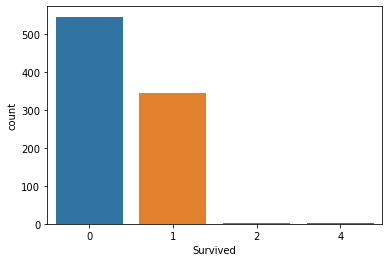

In [14]:
sns.countplot(x='Survived',data=df)

In [15]:
df.Survived.value_counts()

0    545
1    344
2      1
4      1
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

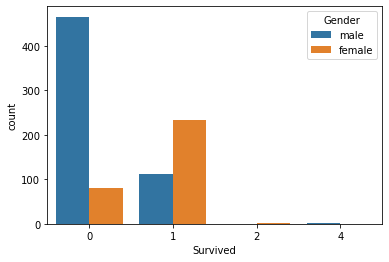

In [16]:
sns.countplot(x = 'Survived', hue='Gender',data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

<AxesSubplot:xlabel='Survived', ylabel='count'>

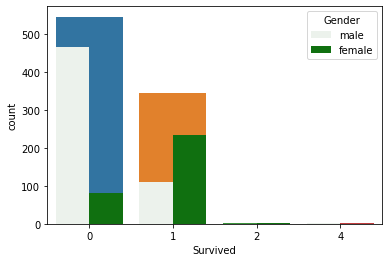

In [17]:
display(sns.countplot(x = 'Survived',data=df))
display(sns.countplot(x = 'Survived', hue='Gender',data=df,color='Green'))

In [18]:
df.Survived = df.Survived.replace({2:1,4:0})

In [19]:
df.Survived.unique()

array([0, 1], dtype=int64)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

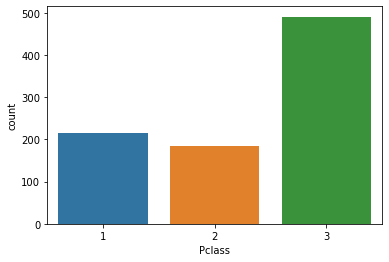

In [20]:
sns.countplot(x = 'Pclass',data=df)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

<AxesSubplot:xlabel='Pclass', ylabel='count'>

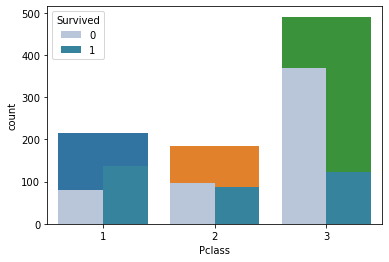

In [21]:
display(sns.countplot(x = 'Pclass',data=df))
display(sns.countplot(x = 'Pclass', hue='Survived',data=df,palette='PuBuGn'))

<AxesSubplot:xlabel='Pclass', ylabel='count'>

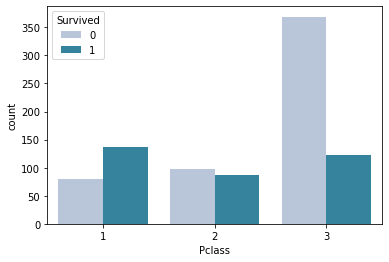

In [22]:
display(sns.countplot(x = 'Pclass', hue='Survived',data=df,palette='PuBuGn'))

<AxesSubplot:xlabel='Pclass', ylabel='count'>

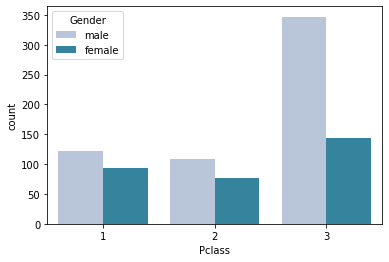

In [23]:
display(sns.countplot(x = 'Pclass', hue='Gender',data=df,palette='PuBuGn'))

<AxesSubplot:xlabel='SibSp'>

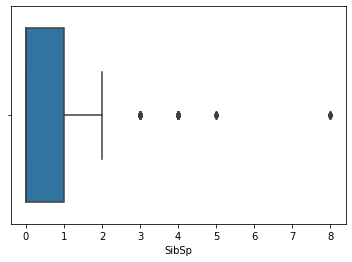

In [24]:
sns.boxplot(x='SibSp',data=df)

<AxesSubplot:xlabel='Fare'>

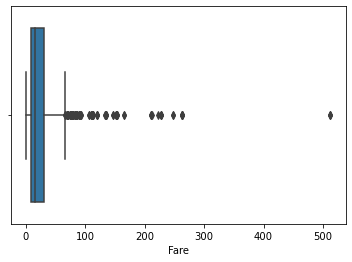

In [25]:
sns.boxplot(x='Fare',data=df)

<AxesSubplot:>

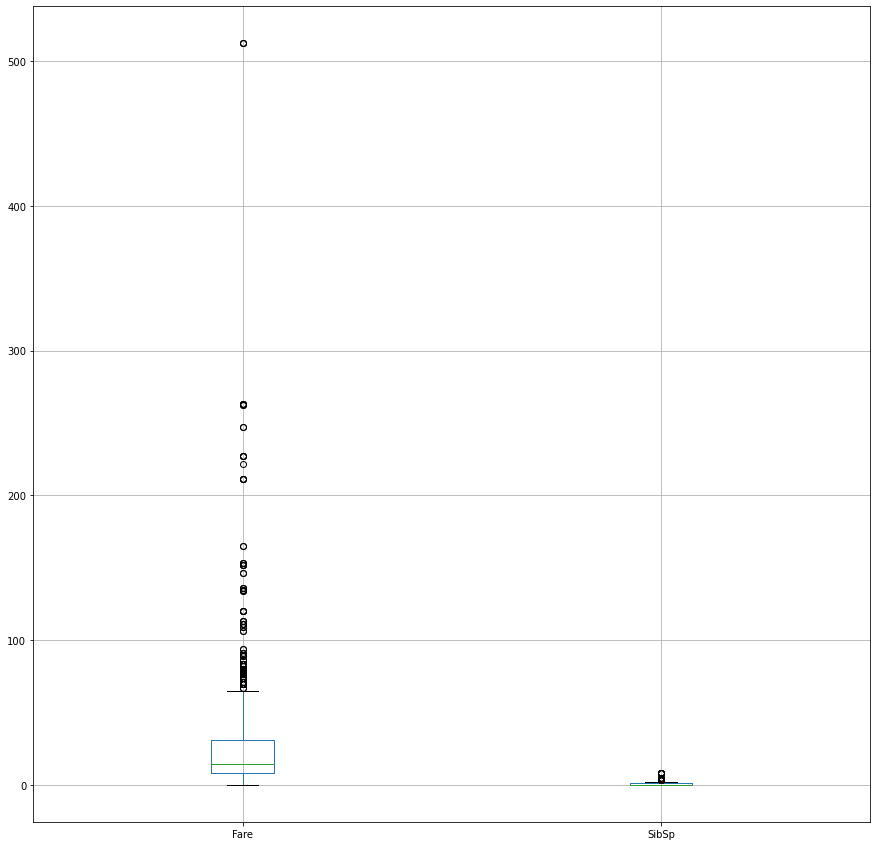

In [26]:
plt.figure(figsize=(15,15))
df.boxplot(column=['Fare','SibSp'])

In [27]:
sorted(df.SibSp.unique())

[0, 1, 2, 3, 4, 5, 8]

In [28]:
df[df.SibSp>2].shape

(46, 12)

In [29]:
df[df.Fare>200].shape

(20, 12)

In [30]:
df = df[df.Fare<200]

In [31]:
df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [32]:
df.Embarked.value_counts()

S    636
C    156
Q     77
Name: Embarked, dtype: int64

In [33]:
df.Embarked.isna().sum()

2

In [34]:
df.Embarked.fillna('S',inplace=True)

c:\Users\Pratik\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [35]:
df.Embarked.value_counts()

S    638
C    156
Q     77
Name: Embarked, dtype: int64

In [36]:
df.Gender = df.Gender.replace('male',0).replace('female',1)

c:\Users\Pratik\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [37]:
df.Gender.unique()

array([0, 1], dtype=int64)

In [38]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Gender', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [39]:
df.Cabin.isnull().sum()

684

In [40]:
df

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,C


In [41]:
df = df.drop(['PassengerId','Name','Cabin','Ticket'],axis=1)

In [42]:
df.Age = df.Age.fillna(df.Age.mean())

In [43]:
df

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.000000,1,0,7.2500,S
1,1,1,1,38.000000,1,0,71.2833,C
2,1,3,1,26.000000,0,0,7.9250,S
3,1,1,1,35.000000,1,0,53.1000,S
4,0,3,0,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,S
887,1,1,1,19.000000,0,0,30.0000,S
888,0,3,1,29.661164,1,2,23.4500,S
889,1,1,0,26.000000,0,0,30.0000,C


In [44]:
df = pd.get_dummies(df,prefix=['Embarked'],drop_first=True)

In [45]:
df

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0,22.000000,1,0,7.2500,0,1
1,1,1,1,38.000000,1,0,71.2833,0,0
2,1,3,1,26.000000,0,0,7.9250,0,1
3,1,1,1,35.000000,1,0,53.1000,0,1
4,0,3,0,35.000000,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,0,1
887,1,1,1,19.000000,0,0,30.0000,0,1
888,0,3,1,29.661164,1,2,23.4500,0,1
889,1,1,0,26.000000,0,0,30.0000,0,0


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 871 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    871 non-null    int64  
 1   Pclass      871 non-null    int64  
 2   Gender      871 non-null    int64  
 3   Age         871 non-null    float64
 4   SibSp       871 non-null    int64  
 5   Parch       871 non-null    int64  
 6   Fare        871 non-null    float64
 7   Embarked_Q  871 non-null    uint8  
 8   Embarked_S  871 non-null    uint8  
dtypes: float64(2), int64(5), uint8(2)
memory usage: 56.1 KB


In [47]:
df.corr()

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
Survived,1.000000,-0.322983,0.532938,-0.082279,-0.028772,0.082957,0.296419,0.014483,-0.141358
Pclass,-0.322983,1.000000,-0.118369,-0.340795,0.094324,0.051138,-0.653248,0.216358,0.050278
Gender,0.532938,-0.118369,1.000000,-0.084441,0.110942,0.251004,0.232512,0.079045,-0.115601
Age,-0.082279,-0.340795,-0.084441,1.000000,-0.229770,-0.192121,0.127849,-0.013675,-0.017580
SibSp,-0.028772,0.094324,0.110942,-0.229770,1.000000,0.409380,0.246085,-0.025241,0.065138
Parch,0.082957,0.051138,0.251004,-0.192121,0.409380,1.000000,0.230427,-0.077635,0.066605
Fare,0.296419,-0.653248,0.232512,0.127849,0.246085,0.230427,1.000000,-0.140705,-0.109163
Embarked_Q,0.014483,0.216358,0.079045,-0.013675,-0.025241,-0.077635,-0.140705,1.000000,-0.515309
Embarked_S,-0.141358,0.050278,-0.115601,-0.017580,0.065138,0.066605,-0.109163,-0.515309,1.000000


# Building the model

## splitting the data

In [48]:
x = df.drop('Pclass',axis=1)
y = df['Pclass']

## hold out validation

In [49]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=52)

## creating an instance of the model

In [50]:
Log_Reg = LogisticRegression()
Log_Reg

LogisticRegression()

In [51]:
Log_Reg.fit(x_train,y_train)

c:\Users\Pratik\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## prediction 

In [52]:
y_pred = Log_Reg.predict(x_test)
y_pred

array([3, 1, 2, 3, 3, 1, 3, 2, 3, 2, 1, 3, 3, 2, 3, 1, 1, 3, 3, 1, 3, 2,
       3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 2, 1, 3, 2, 3, 3, 3, 3, 1, 2, 2, 2,
       3, 2, 1, 3, 3, 3, 3, 1, 1, 2, 3, 1, 1, 3, 3, 1, 3, 3, 1, 3, 2, 3,
       3, 3, 3, 3, 1, 3, 3, 3, 3, 1, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 1,
       3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 1, 3, 3, 3, 3, 1, 3, 1, 1, 1, 3,
       3, 3, 3, 1, 3, 3, 1, 1, 1, 3, 3, 1, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3,
       2, 3, 3, 3, 2, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 1, 2, 1, 3,
       3, 2, 2, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 2, 3, 3, 1],
      dtype=int64)

# Model Evaluation

In [53]:
cnf_matrix = confusion_matrix(y_test,y_pred)
cnf_matrix

array([[33,  4,  2],
       [ 2, 14, 17],
       [ 2,  5, 96]], dtype=int64)

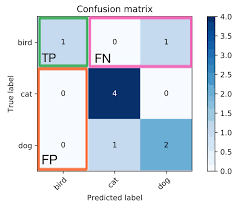

In [54]:
from IPython.display import Image
Image('multiclass confusion matrix.png')

In [55]:
multiclass_conf_mat = multilabel_confusion_matrix(y_test,y_pred)
multiclass_conf_mat

array([[[132,   4],
        [  6,  33]],

       [[133,   9],
        [ 19,  14]],

       [[ 53,  19],
        [  7,  96]]], dtype=int64)

In [56]:
# Accuracy score
(33+14+96)/(33+14+96+4+2+2+5+2+17)

0.8171428571428572

In [57]:
accuracy_score(y_test,y_pred)

0.8171428571428572

In [58]:
# precision for 1
33/37

0.8918918918918919

In [59]:
# precision for 2
14/23

0.6086956521739131

In [60]:
# recall for 1
33/39

0.8461538461538461

In [61]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.89      0.85      0.87        39
           2       0.61      0.42      0.50        33
           3       0.83      0.93      0.88       103

    accuracy                           0.82       175
   macro avg       0.78      0.73      0.75       175
weighted avg       0.80      0.82      0.81       175



In [62]:
y_pred

array([3, 1, 2, 3, 3, 1, 3, 2, 3, 2, 1, 3, 3, 2, 3, 1, 1, 3, 3, 1, 3, 2,
       3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 2, 1, 3, 2, 3, 3, 3, 3, 1, 2, 2, 2,
       3, 2, 1, 3, 3, 3, 3, 1, 1, 2, 3, 1, 1, 3, 3, 1, 3, 3, 1, 3, 2, 3,
       3, 3, 3, 3, 1, 3, 3, 3, 3, 1, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 1,
       3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 1, 3, 3, 3, 3, 1, 3, 1, 1, 1, 3,
       3, 3, 3, 1, 3, 3, 1, 1, 1, 3, 3, 1, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3,
       2, 3, 3, 3, 2, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 1, 2, 1, 3,
       3, 2, 2, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 2, 3, 3, 1],
      dtype=int64)

In [63]:
y_pred_prob = Log_Reg.predict_proba(x_test)
y_pred_prob

array([[8.03456730e-02, 3.01584765e-01, 6.18069562e-01],
       [9.89427559e-01, 1.05587760e-02, 1.36650234e-05],
       [5.04454725e-03, 5.32011677e-01, 4.62943776e-01],
       [2.65141364e-02, 2.10726542e-01, 7.62759322e-01],
       [9.77963013e-02, 8.59777390e-02, 8.16225960e-01],
       [5.70655934e-01, 3.95623673e-01, 3.37203927e-02],
       [1.18044966e-02, 1.55272555e-01, 8.32922948e-01],
       [2.58852088e-03, 5.88108773e-01, 4.09302706e-01],
       [1.61876816e-02, 1.75375464e-01, 8.08436854e-01],
       [1.88043103e-02, 5.75191462e-01, 4.06004228e-01],
       [8.86350099e-01, 1.13606966e-01, 4.29350172e-05],
       [8.34773149e-02, 1.30887538e-01, 7.85635147e-01],
       [1.68144058e-02, 1.75304300e-01, 8.07881295e-01],
       [1.10817214e-01, 6.18606609e-01, 2.70576178e-01],
       [1.08598457e-01, 2.79348045e-02, 8.63466738e-01],
       [5.99290004e-01, 3.66782646e-01, 3.39273498e-02],
       [5.80232169e-01, 4.16564996e-01, 3.20283530e-03],
       [3.02452199e-02, 3.20149

In [64]:
y_test

152    3
385    2
279    3
614    3
661    3
      ..
490    3
684    2
584    3
517    3
504    1
Name: Pclass, Length: 175, dtype: int64